<center>##Airbnb booking data cleaning</center>

In [1]:
import os
import pathlib
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#!ls ../input/

## Preliminary investigation of the data

In [4]:
def detect_nan_strings(df):
    for column in df.columns:
        print("\n\ncolumn: {}:".format(column))
        print("-" * 20)
        try:
            print("is NAN string:\n", any(df[column] == 'NAN'))
            print("is NAN string:\n", any(df[column] == 'nan'))
            print("is NAN string:\n", any(df[column] == 'NaN'))
        except TypeError:
            print("column {} not str type".format(column))

In [5]:
def uniques_count(df):
    return {column: df[column].groupby(by=df[column]).count() for column in df.columns}

###<center> Data loading and preliminary investigation</center>

In [6]:
users_df = pd.read_csv('../input/train_users_2.csv')

In [7]:
sessions_df = pd.read_csv('../input/sessions.csv')

In [8]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [9]:
users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [10]:
users_df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [60]:
sorted_age = users_df['age'].sort_values()

In [61]:
sorted_age.head()

83117     1.0
194600    1.0
84865     2.0
5749      2.0
191312    2.0
Name: age, dtype: float64

In [62]:
sorted_age.tail()

213442   NaN
213444   NaN
213447   NaN
213449   NaN
213450   NaN
Name: age, dtype: float64

We can see that is significant number of NaNs in 'date_first_booking' and 'age' columns. And min age is 1 and max age is 2014
that is terrible.

In [45]:
count_age_values = users_df['age'].groupby(by=users_df['age']).count().sort_index()

In [51]:
count_age_values.shape

(127,)

In [52]:
count_age_values.min()

1

In [74]:
count_age_values.idxmax()

30.0

In [75]:
count_age_values[30]

6124

In [47]:
count_age_values.head()

age
1.0      2
2.0      7
4.0      3
5.0     45
15.0     8
Name: age, dtype: int64

In [48]:
count_age_values.tail()

age
1953.0      1
1995.0      1
2008.0      1
2013.0     39
2014.0    710
Name: age, dtype: int64

For clarity, let's make some graphs.

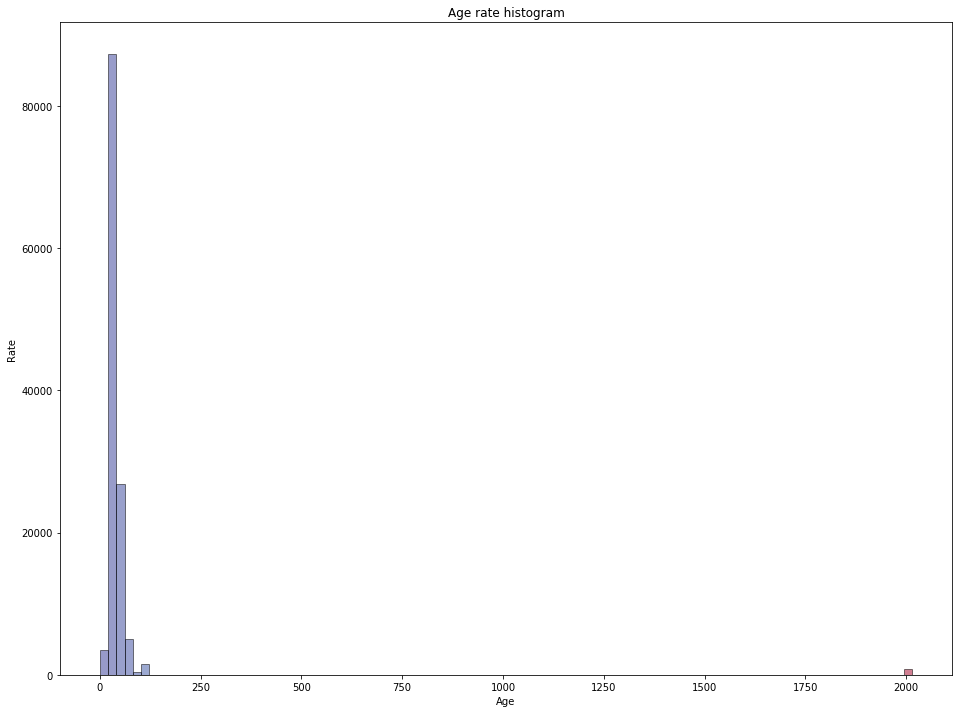

In [66]:
cm = plt.cm.get_cmap('RdYlBu_r')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(users_df['age'].sort_values().dropna(), 100, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Age")
ax.set_ylabel("Rate")
ax.set_title("Age rate histogram")
plt.show()

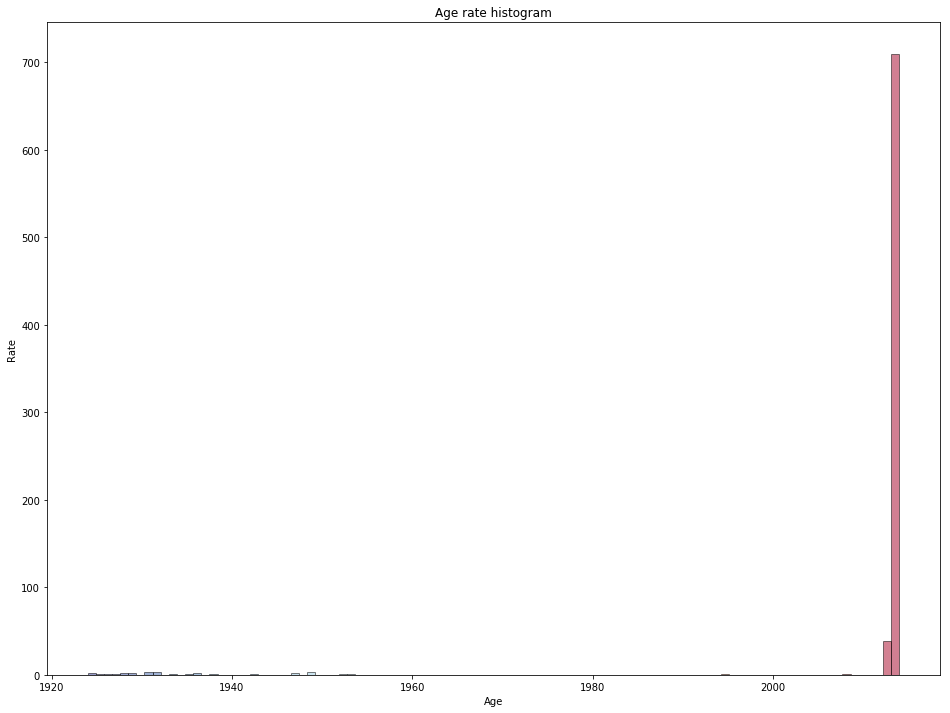

In [67]:
cm = plt.cm.get_cmap('RdYlBu_r')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(users_df.loc[users_df['age'] > 500, 'age'].sort_values().dropna(), 100, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Age")
ax.set_ylabel("Rate")
ax.set_title("Age rate histogram")
plt.show()

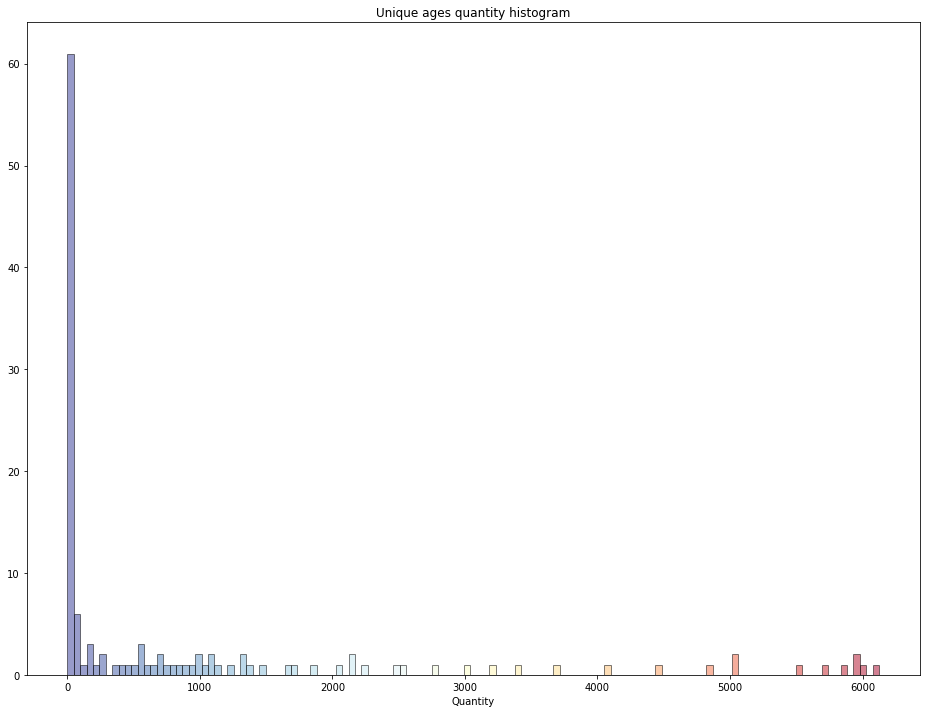

In [84]:
cm = plt.cm.get_cmap('RdYlBu_r')
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(count_age_values.values, 127, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Quantity")
#ax.set_ylabel("Quantity")
ax.set_title("Unique ages quantity histogram")
#ax.set_ylim(count_age_values.min(), count_age_values.max())
#ax.set_ylim(1, 70)
plt.show()

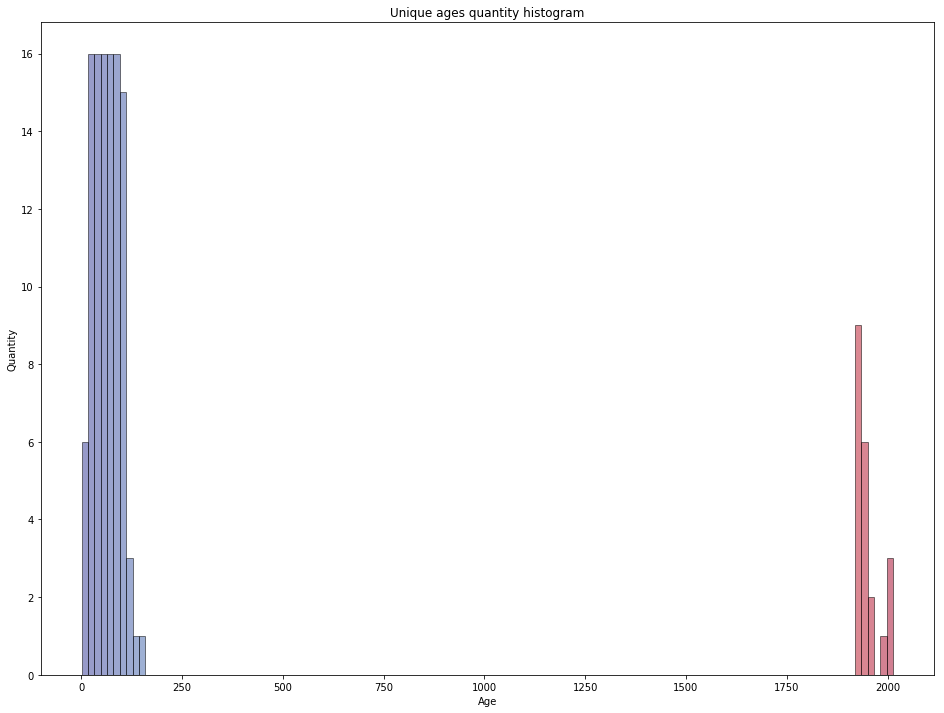

In [79]:
cm = plt.cm.get_cmap('RdYlBu_r')

#n, bins, patches = ax.hist(count_age_values, 20, color='green', alpha=0.5, histtype='bar', ec='black')
n, bins, patches = ax.hist(count_age_values.index, 127, color='green', alpha=0.5, histtype='bar', ec='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, path in zip(col, patches):
    plt.setp(path, 'facecolor', cm(c))
ax.set_xlabel("Age")
ax.set_ylabel("Quantity")
ax.set_title("Unique ages quantity histogram")
plt.show()

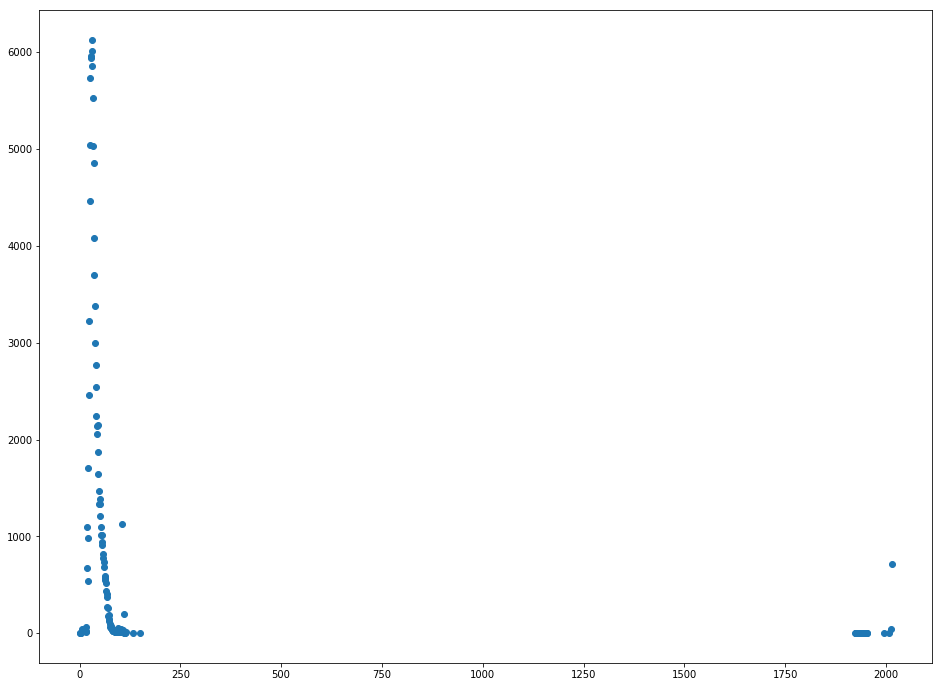

In [87]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.scatter(count_age_values.index, count_age_values.values)

fig_box = plt.figure(figsize=(16, 12))
ax_box = fig_box.add_subplot(111)
#ax_box.boxplot(users_df['age'].values, 1)
ax_box.boxplot(users_df)
plt.show()

Find a most common age value (mode)

In [88]:
age_mode = count_age_values.idxmax()

In [89]:
age_mode

30.0

Suppose that all values of age less than 18 and greater than 90 are erroneous
(for example, the user made a mistake when entering and entered the current year)
Assign to such dates NaN:

In [90]:
users_df.loc[users_df['age'] > 90, 'age'] = np.nan
users_df.loc[users_df['age'] < 16, 'age'] = np.nan

And fill them by age mode

In [91]:
users_df.loc[users_df['age'].isnull(), 'age'] = age_mode

In [92]:
any(users_df['age'].isnull())

False

Now we need to decide what to do with 'date_first_booking' column. Calculate what percentage of non NaN values:

In [94]:
print("{}%".format(users_df[users_df['date_first_booking'].notna()].shape[0] / users_df.shape[0] * 100))

41.65265095970504%


Since it contains only  42% not NaN values it seems appropriate to drop this column.
Simple strategies - fill in the values with the most common value from the non NaN part,
or the average is unlikely to fit here, and more complex ones are unlikely to work. But, anyway, you can try
to fill NaN values with values from the non-NaN part with the same frequency distribution as in the non-NaN part.
And further, when using for training the model, it will be possible to check both options - with the column droped and with the filled.

In [123]:
#select rows where 'date_first_booking' column contain NaN
date_first_booking_na = users_df.loc[users_df['date_first_booking'].isna(), 'date_first_booking']
#Select rows where 'date_first_booking' column not contain NaN
date_first_booking_notna = users_df.loc[users_df['date_first_booking'].notna(), 'date_first_booking']
#group by date first booking
gropuped_date_first_booking_notnan = date_first_booking_notna.groupby(by=users_df['date_first_booking'])
#compute quantity of each date value 
count_gropuped_date_first_booking_notnan = gropuped_date_first_booking_notnan.count()
#compute relative frequencies (probabilities) of each value
frequencies = count_gropuped_date_first_booking_notnan / count_gropuped_date_first_booking_notnan.sum()
#make array that contain fill values with the same relative frequencies in as in 'not NaN' column part
date_first_booking_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(len(date_first_booking_na))])
#fill values
users_df.loc[users_df['date_first_booking'].isna(), 'date_first_booking'] = date_first_booking_fill_values

In [127]:
any(users_df['date_first_booking'].isna())

False

Now consider the sessions dataset

In [128]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [129]:
sessions_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [130]:
sessions_df.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [131]:
sessions_df.isna().sum() / len(sessions_df) * 100

user_id           0.326428
action            0.753482
action_type      10.657003
action_detail    10.657003
device_type       0.000000
secs_elapsed      1.287229
dtype: float64

We can see that all columns, except 'device type', in sessions datasets have NaN values. 'action_type' and 'action_detail'
have about 11% NaNs. It seems appropriate to fill such values. And NaN in other columns should also be filled,
except 'user_id' column (NaNs in this column look at least strange.).
In this case, it is most advisable to delete rows containing NaN values in 'user_id' column,
the more so because they are few .
But first, let's take a closer look at this column.

In [ ]:
for column in sessions_df.columns:
    print("\n\ncolumn: {}:".format(column))
    print("-" * 20)
    print("value_counts:\n", sessions_df[column].value_counts())

In [145]:
users_df_unique_user_ids = set(users_df['id'].unique())
sessions_df_unique_user_ids = set(sessions_df['user_id'].unique())

In [146]:
print(len(users_df_unique_user_ids))
print(len(sessions_df_unique_user_ids))

213451
135484


We can see that the number of unique usrers identifiers is quite different.
Calculate numbers of match ids, and and not match ids.

In [148]:
print("len of intersection:", len(users_df_unique_user_ids.intersection(sessions_df_unique_user_ids)))
print(
    "len of difference unique user ids in users_df and sessions_df:",
    len(users_df_unique_user_ids.difference(sessions_df_unique_user_ids)))
print("len of difference unique user ids in sessions_df and users_df:", len(sessions_df_unique_user_ids.difference(user_df_unique_user_ids)))

len of intersection: 73815
len of difference unique user ids in users_df and sessions_df: 139636
len of difference unique user ids in sessions_df and users_df: 61669


The most interesting is that in sessions dataset there are identifiers of which are not in users dataset. And number
of intersected users ids not very large. But, all the same, it makes sense to use user dataset in combination
with sessions dataset.

Preliminary results:
1. We can see that some columns in sessions data and users data have signficant numbers of NaN values.
sessions:
user_id           0.326428% (which is curious in itself)
action            0.753482%
action_type      10.657003%
action_detail    10.657003%
device_type       0.000000%
secs_elapsed      1.287229%

2. user_id column in sessions data contain 0.326428% NaNs, rows with will be deleted when we  will simultaneously use data from sessions and users datasets (or may be we find the way fill this values).
3. Deciding what to do with the NaNs in columns action_type and action_detail (Delete or fill by average, mode or by values that we can retrieve using simple ML models) requires additional exploring.
4. NaNs in secs_elapsed in session data we can fill by mean or mode.
5. NaNs in first_affiliate_tracked in users data make sense delete or fill by mode.
6. NaNs in date_first_booking requires additional eploring. Or delete whole column if additional exploring don't give result.
7. Same for age column.
8. It is also worth paying attention to the fact that the set of user IDs in sessions dataset and users dataset  do not match, but only intersect in some part of thes. There are users whose IDs are in session dataset  but not in users dataset, which
strange.
9. It is also worthwhile to look in more detail at the distribution of the number of unique values in each column of each dataset.
10. Add columns with timestamps converted in datetime format.

In [ ]:
print(sessions_df.shape)

In [150]:
action_count = sessions_df['action'].groupby(by=sessions_df['action']).count()

In [153]:
action_count.shape

(359,)

Select rows with NaN in 'action' column

In [154]:
action_nan = sessions_df[sessions_df['action'].isna()] 

In [159]:
print(len(action_nan['action_type'].unique()))
print(len(action_nan['action_detail'].unique()))
print(len(action_nan['device_type'].unique()))
print(len(action_nan['user_id'].unique()))

1
1
13
43130


Column 'user_id' requires further study, the remaining columns will be investigated in more detail now. We can see that
 'action_type' and 'action_detail' columns contain only one value.

In [160]:
print(action_nan['action_type'].unique())
print(action_nan['action_detail'].unique())
print(action_nan['device_type'].unique())

['message_post']
['message_post']
['Windows Desktop' 'iPad Tablet' 'Mac Desktop' 'iPhone' 'Linux Desktop'
 'Android App Unknown Phone/Tablet' 'Android Phone' 'Tablet' '-unknown-'
 'Chromebook' 'Windows Phone' 'iPodtouch' 'Blackberry']


We can see that 'action_type' and 'action_detail' contains the same value: 'message_post' if 'action'
contain NaN in that row

In [162]:
action_not_na = sessions_df[sessions_df['action'].notna()]

In [168]:
action_not_na_uniques = action_not_na['action'].unique()
action_type_not_na_uniques = action_not_na['action_type'].unique()
action_detail_not_na_uniques = action_not_na['action_detail'].unique()

In [166]:
type(action_not_na_uniques)

numpy.ndarray

In [169]:
print('message_post' in action_type_not_na_uniques)
print('message_post' in action_detail_not_na_uniques)

True
True


In [175]:
print(action_not_na.loc[action_not_na['action_type'] == 'message_post', 'action'].unique())
print(action_not_na.loc[action_not_na['action_detail'] == 'message_post', 'action'].unique())
print()
print(
    set(action_not_na[action_not_na['action_type'] == 'message_post'].index) == 
    set(action_not_na[action_not_na['action_detail'] == 'message_post'].index)
)

['15' '12' '10' '11' 'multi_message' 'guest_booked_elsewhere'
 'preapproval' 'maybe_information' 'special_offer']
['15' '12' '10' '11' 'multi_message' 'guest_booked_elsewhere'
 'preapproval' 'maybe_information' 'special_offer']

True


We can see that indexes of rows, where 'action_type' and 'action_detail' columns contains 'message_post' value, match up.
Hence we can fill NaNs in 'action' column with values from 'not NaN' part of 'action' column

In [185]:
grouped_action_not_na = action_not_na.loc[action_not_na['action_type'] == 'message_post', 'action'].groupby(
    by=action_not_na['action_type'])
count_action_not_na = grouped_action_not_na.count()
frequencies = count_action_not_na / count_action_not_na.sum()
action_na_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(len(action_nan))])

date_first_booking_na = users_df.loc[users_df['date_first_booking'].isna(), 'date_first_booking']
date_first_booking_notna = users_df.loc[users_df['date_first_booking'].notna(), 'date_first_booking']
gropuped_date_first_booking_notnan = date_first_booking_notna.groupby(by=users_df['date_first_booking'])
count_gropuped_date_first_booking_notnan = gropuped_date_first_booking_notnan.count()

frequencies = count_gropuped_date_first_booking_notnan / count_gropuped_date_first_booking_notnan.sum()

action_fill_values = np.array(
    [np.random.choice(frequencies.index, p=frequencies.values) for _ in range(len(action_nan))])
sessions_df.loc[sessions_df['action'].isna(), 'action'] = action_fill_values

In [186]:
any(sessions_df['action'].isna())

False

Now consider columns 'action_type' and 'action_detail'. They have the same number of NaNs, and we can assume that the indices of the rows in which these values are located match up.

In [190]:
all(sessions_df[sessions_df['action_type'].isna()].index == sessions_df[sessions_df['action_detail'].isna()].index)

True

In [ ]:
The rows are the same as we expected. Select rows that contain NaN in 'action_type' and 'action_detail'
and rows that not contain.

In [191]:
act_td_nans_df = sessions_df[sessions_df['action_detail'].isna()]
act_td_not_nans_df = sessions_df[sessions_df['action_detail'].notna()]

In [192]:
act_td_nans_df.shape

(1126204, 6)

In [193]:
act_td_nans_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [194]:
act_td_not_nans_df.shape

(9441533, 6)

In [195]:
act_td_not_nans_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0


For a more detailed study of the relationships of columns 'action_type' and 'action_detail'
with other columns, we use the uniques_count function defined above, which makes a dictionary of dataframes
containing unique values of column and number of each value

In [196]:
act_td_nans_uniques_count = uniques_count(act_td_nans_df)

In [197]:
act_td_not_nans_uniques_count = uniques_count(act_td_not_nans_df)

We will not explore column 'user_id' - it contains too many unique values.

user_id_nans = act_det_nans_values_count['user_id']

user_id_not_nans = act_det_not_nans_values_count['user_id']

user_id_nans_set = set(user_id_nans.index)
user_id_not_nans_set = set(user_id_not_nans.index)

print(len(user_id_nans_set), len(user_id_not_nans), len(user_id_nans_set.intersection(user_id_not_nans_set)))

user_id_nans_only_set = user_id_nans_set.difference(user_id_not_nans_set)

len(user_id_nans_only_set)

user_id_nans_only_set

user_id_nans.index

for index in user_id_nans_only_set:
    print(user_id_nans[index])

In [ ]:
#user_id_nans['16o67suu17']

Consider columns 'action_type', 'action_detail' itself

action_td_nans_uniques_count =  act_td_nans_uniques_count['action']

len(action_td_nans_uniques_count)

action_td_not_nans_uniques_count = act_td_not_nans_uniques_count['action']

len(action_td_not_nans_uniques_count)

devicet_td_nans_uniques_count = act_td_nans_uniques_count['device_type']
devicet_td_not_nans_uniques_count = act_det_not_nans_values_count['device_type']

In [210]:
#actiont_td_nans_uniques_count = act_td_nans_uniques_count['action_type']
actiont_td_not_nans_uniques_count = act_td_not_nans_uniques_count['action_type']

In [211]:
#print(len(actiont_td_nans_uniques_count))
print(len(actiont_td_not_nans_uniques_count))

10


In [212]:
#actiond_td_nans_uniques_count = act_td_nans_uniques_count['action_detail']
actiond_td_not_nans_uniques_count = act_td_not_nans_uniques_count['action_detail']

In [213]:
#print(len(actiond_td_nans_uniques_count))
print(len(actiond_td_not_nans_uniques_count))

155


print(len(act_det_nans_device_type))
print(len(act_det_not_nans_device_type))

for column in act_det_nans_values_count.keys():
    print("\n\n", column)
    print("-" * 30)
    print(len(act_det_nans_values_count[column]))
    print(len(act_det_not_nans_values_count[column]))

In [ ]:
action_act_det_nans_set = set(act_det_nans_values_count['action'].index)
action_act_det_not_nans_set = set(act_det_not_nans_values_count['action'].index)

In [ ]:
len(action_act_det_nans_set.union(action_act_det_not_nans_set))

In [ ]:
intersected_actions = action_act_det_nans_set.intersection(action_act_det_not_nans_set)
only_nans_actions = action_act_det_nans_set.difference(action_act_det_not_nans_set)

In [ ]:
print(intersected_actions)
print(only_nans_actions)

In [ ]:
#act_det_nans_action[act_det_nans_action.isin(intersected_actions)]

In [ ]:
#act_det_nans_action[act_det_nans_action.isin(only_nans_actions)]

In [ ]:
act_det_nans_action[intersected_actions]

In [ ]:
act_det_nans_action[only_nans_actions]

In [ ]:
act_det_not_nans_action[intersected_actions]

In [ ]:
#act_det_not_nans_action[only_nans_actions]

In [ ]:
for act in intersected_actions:
    print("\n\n", act)
    print("*" * 30)
    print("act_det_nans_action[{}]:".format(act), act_det_nans_action[act])
    print("percent:", act_det_nans_action[act] / act_det_nans_action.sum() * 100)
    print("act_det_not_nans_action[{}]:".format(act), act_det_not_nans_action[act])
    print("percent:", act_det_not_nans_action[act] / act_det_not_nans_action.sum() * 100)

for act in only_nans_actions:
    print("\n\n", act)
    print("*" * 30)
    print("act_det_nans_action[{}]:".format(act), act_det_nans_action[act])
    print("percent:", act_det_nans_action[act] / act_det_nans_action.sum() * 100)
    #print("act_det_not_nans_action[{}]:".format(act), act_det_not_nans_action[act])
    #print("percent:", act_det_not_nans_action[act] / act_det_not_nans_action.sum() * 100)

This is make sense drop all rows that in 'action' column have one of the values that contains in only_nans_actions set
In rows that contains in 'action' column values from intersected_actions set we can substitude (in columns 'action_type' and 'action_detail' values from rows with same value in 'action' (but not have NaNs in 'action_type' and 'action_detail')

In [ ]:
act_det_not_nans_action['localization_settings']

In [ ]:
type(act_det_not_nans_action)

In [ ]:
act_det_not_nans_df[act_det_not_nans_df['action'] == 'localization_settings']

In [ ]:
#act_det_not_nans_df[act_det_not_nans_df['action'] == 'show']

In [ ]:
act_show_not_nans_df = act_det_not_nans_df[act_det_not_nans_df['action'] == 'show']

In [ ]:
#act_show_not_nans_df['action_type'].groupby(by=act_show_not_nans_df['action_type']).count()

In [ ]:
#act_show_not_nans_df['action_detail'].groupby(by=act_show_not_nans_df['action_detail']).count()

In [ ]:
for act in intersected_actions:
    print("\n\n", act)
    print("*" * 30)
    print("act_det_nans_action[{}]:".format(act), act_det_nans_action[act])
    print("percent:", act_det_nans_action[act] / act_det_nans_action.sum() * 100)
    print("act_det_not_nans_action[{}]:".format(act), act_det_not_nans_action[act])
    print("percent:", act_det_not_nans_action[act] / act_det_not_nans_action.sum() * 100)    
    #print("\n\n\naction value:", act)
    #print("*" * 30)
    print()
    act_type_df = act_det_not_nans_df[act_det_not_nans_df['action'] == act]
    act_type = act_type_df['action_type'].groupby(by=act_type_df['action_type'])
    act_type_count = act_type.count()
    print("count:\n", act_type_count)
    print("proportion:\n", act_type_count / act_type_count.sum())
    print()
    act_det = act_type_df['action_detail'].groupby(by=act_type_df['action_detail'])
    act_det_count = act_det.count()
    print("count:\n", act_det_count)
    print("proportion:\n", act_det_count / act_det_count.sum())

Using this information we can fill NaNs in 'action_type' and 'action_detail' columns with distribution close to distribution
corresponding values in not NaNs part. If action = 'currencies' me set '-unknown-' in both action_type and action_detail columns (or may be simply drop rows that have 'currencies' in action, since there are few such rows). If action = 'localization_settings' me set '-unknown-' in both action_type and action_detail columns. We can't drop these rows as there are many such rows. The same for 'campaigns' in 'action'. And write function that fill NaNs for other actions corresponding to probabilities in not NaNs part.

In [ ]:
def fill_action_nans(actions, session_df, act_not_nans_df):
    for act in actions:
        act_df = act_not_nans_df[act_not_nans_df['action'] == act]
        act_type = act_df['action_type'].groupby(by=act_df['action_type'])
        act_type_count = act_type.count()
        
        act_type_proportions =  act_type_count / act_type_count.sum()

        act_det = act_df['action_detail'].groupby(by=act_df['action_detail'])
        act_det_count = act_det.count()
        
        act_detail_proportions = act_det_count / act_det_count.sum()
        
        act_nans_df = sessions_df.loc[sessions_df['action_type'].isna() & (sessions_df['action'] == act)]
        
        act_nans_len = len(act_nans_df[act_nans_df['action'] == act])

        act_type_fill_values = np.array(
            [np.random.choice(act_type_count.index, p=act_type_proportions.values) for _ in range(act_nans_len)])
        act_detail_fill_values = np.array(
            [np.random.choice(act_det_count.index, p=act_detail_proportions.values) for _ in range(act_nans_len)])
        #print(len(act_nans_df.loc[act_nans_df['action'] == act, 'action_type']))
        #print(len(act_type_fill_values))
        
        
        act_nans_df.loc[:, 'action_type'] = act_type_fill_values
        act_nans_df.loc[:, 'action_detail'] = act_detail_fill_values
        #print(act_nans_df.loc[act_nans_df['action'] == act, 'action_type'])
    return sessions_df

In [ ]:
act_det_nans_action_copy = act_det_nans_action.copy()

In [ ]:
filled_nans_df = fill_action_nans(['update', 'show', 'index'], sessions_df.copy(), act_det_not_nans_df)

In [ ]:
act_det_not_nans_action.head()

In [ ]:
filled_nans_df.loc[filled_nans_df['action'] == 'show', 'action_detail']

In [ ]:
len(sessions_df.loc[sessions_df['action_type'].isna() & (sessions_df['action'] == 'show')])

In [ ]:
is_na_sessions_df = sessions_df[sessions_df['action_type'].isna()]

In [ ]:
is_na_sessions_df.head()

In [ ]:
sessions_df.shape

In [ ]:
is_na_sessions_df.shape

In [ ]:
not_na_sessions_df = sessions_df[sessions_df['action_type'].notna()]

In [ ]:
not_na_sessions_df.shape

In [ ]:
sessions_df.shape[0] == is_na_sessions_df.shape[0] + not_na_sessions_df.shape[0]

In [ ]:
def fill_action_nans(actions, session_df):
    is_na_df = sessions_df[sessions_df['action_type'].isna()]
    not_na_df = sessions_df[sessions_df['action_type'].notna()]
    
    for act in actions:

        act_df = not_na_df[not_na_df['action'] == act]
        act_type = act_df['action_type'].groupby(by=act_df['action_type'])
        act_type_count = act_type.count()
        
        act_type_proportions =  act_type_count / act_type_count.sum()
        act_det = act_df['action_detail'].groupby(by=act_df['action_detail'])
        act_det_count = act_det.count()
        act_detail_proportions = act_det_count / act_det_count.sum()        
        act_is_na_df = is_na_df[is_na_df['action'] == act]
        
        act_is_na_len = len(act_is_na_df)

        act_type_fill_values = np.array(
            [np.random.choice(act_type_count.index, p=act_type_proportions.values) for _ in range(act_is_na_len)])
        act_detail_fill_values = np.array(
            [np.random.choice(act_det_count.index, p=act_detail_proportions.values) for _ in range(act_is_na_len)])

        sessions_df.loc[sessions_df['action_type'].isna() & (sessions_df['action'] == act), 'action_type'] = act_type_fill_values
        sessions_df.loc[sessions_df['action_detail'].isna() & (sessions_df['action'] == act), 'action_detail'] = act_detail_fill_values
    return sessions_df

In [ ]:
filled_nans_df = fill_action_nans(['update', 'show', 'index'], sessions_df.copy())

In [ ]:
#len( filled_nans_df[filled_nans_df.loc[filled_nans_df['action'] == 'show', 'action_detail'].isna()])

In [ ]:
len(filled_nans_df.loc[filled_nans_df['action'] == 'show', 'action_detail'].notna())

In [ ]:
is_na_action_detail_sessions_df = not_na_sessions_df[not_na_sessions_df['action_detail'].isna()]

In [ ]:
is_na_action_detail_sessions_df.head()

In [ ]:
filled_nans_df[filled_nans_df['action_type'].isna()].shape

In [ ]:
filled_nans_df.shape

In [ ]:
sessions_df[sessions_df['action_type'].isna()].shape

In [ ]:
sessions_df.shape

In [ ]:
filled_nans_df.head()

In [ ]:
filled_nans_df[filled_nans_df['action'] == 'show'].head()

In [ ]:
any(filled_nans_df.loc[filled_nans_df['action'] == 'show', 'action_type'].isna())

In [ ]:
any(filled_nans_df.loc[filled_nans_df['action'] == 'show', 'action_detail'].isna())

In [ ]:
any(filled_nans_df.loc[filled_nans_df['action'] == 'index', 'action_detail'].isna())

In [ ]:
any(filled_nans_df.loc[filled_nans_df['action'] == 'update', 'action_detail'].isna())